In [133]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = 150

In [182]:
%%time
#mypath = '.\\data\\2018'
#filename = os.path.join(mypath, os.listdir(mypath)[0])
filename = '.\\data\\2018_clicked.csv'
#PycharmProjects/dsia_visual_analytics/data/2018_clickd.csv
reader = pd.read_csv('.\\data\\2018_clicked.csv', chunksize=200000)
df = next(reader)
#df = pd.read_csv(filename)

Wall time: 3.74 s


In [162]:
df.shape


(200000, 121)

In [163]:
df['click.Time'] = pd.to_datetime(df['click.Timestamp'])
df['sendout.Time'] = pd.to_datetime(df['record.sentToMTA.Timestamp'])
df['sendout.Hour'] = pd.to_datetime(df['record.sentToMTA.Timestamp']).dt.hour

In [164]:
df['click.TimeDiff'] = df['click.Time'] - df['sendout.Time']
df['click.TimeDiffMinutes'] = df['click.TimeDiff'].dt.seconds / 60

In [165]:
df.head()

,Unnamed: 0,Unnamed: 0.1,user.Id,user.Email,user.MobileNumber,user.FaxNumber,user.Identifier,sentToMTA.Timestamp,sentToMTA.ExternalTransactionId,sentToMTA.SendoutChannel,skip.Timestamp,skip.Category,skip.ExternalTransactionId,bounce.Timestamp,bounce.Category,feedback.Timestamp,feedback.Category,render.Timestamp,render.GeoLocation.ISOCountryCode,render.GeoLocation.RegionCode,render.GeoLocation.City,render.GeoLocation.Latitude,render.GeoLocation.Longitude,render.UserAgent.Platform,render.UserAgent.OperatingSystemName,render.UserAgent.OperatingSystemVersion,render.UserAgent.ClientName,render.UserAgent.ClientVersion,render.UserAgent.RawString,click.Timestamp,click.Link.Id,click.Link.Category.Id,click.Link.Category.Name,click.Link.Url,click.Link.SystemLinkType,click.Link.Type,click.GeoLocation.ISOCountryCode,click.GeoLocation.RegionCode,click.GeoLocation.City,click.GeoLocation.Latitude,click.GeoLocation.Longitude,click.UserAgent.Platform,click.UserAgent.OperatingSystem,click.UserAgent.OperatingSystemVersion,click.UserAgent.ClientName,click.UserAgent.ClientVersion,click.UserAgent.RawString,unsubscribe.Timestamp,forward.Timestamp,conversion.cp.Timestamp,conversion.cp.Id,conversion.cp.Name,conversion.cp.OrderId,conversion.cp.ItemCount,conversion.cp.Amount,conversion.cp.RequestParameters,group.Id,group.Name,group.Email,group.Category.Id,group.Category.Name,message.Id,message.Name,message.Category.Id,message.Category.Name,message.Subject.Unresolved,message.ExternalId,message.Type,message.variation.Id,selection.Id,selection.Name,record.Timestamp,record.Type,record.sentToMTA.Timestamp,record.ExternalTransactionId,sendout.Type,sendout.AddresseeRole,sendout.RecipientType,user.DateOfBirth,user.FirstName,user.ISOCountryCode,user.ISOLanguageCode,user.LastName,user.Nickname,user.PartnerId,user.Source,user.TimeZone,user.Title,user.ZipCode,user.CustomAttribute['BeSCity'],user.CustomAttribute['BeSHome'],user.CustomAttribute['BeSHome2'],user.CustomAttribute['BeSHome3'],user.CustomAttribute['BeSStreet'],user.CustomAttribute['BesZip'],user.CustomAttribute['BIC'],user.CustomAttribute['City'],user.CustomAttribute['Coupon'],user.CustomAttribute['Coupon02'],user.CustomAttribute['IBAN'],user.CustomAttribute['Last_Open_Any_Newsletter_Date'],user.CustomAttribute['PartnerID'],user.CustomAttribute['ProductID'],user.CustomAttribute['SalesOrganization'],user.CustomAttribute['SCSMembernumber'],user.CustomAttribute['SCS_Boutique'],user.CustomAttribute['SCS_Boutique_City'],user.CustomAttribute['SCS_Boutique_Name1'],user.CustomAttribute['SCS_Boutique_Name2'],user.CustomAttribute['SCS_Boutique_Street'],user.CustomAttribute['SCS_Due_Date'],user.CustomAttribute['SCS_Entry_Date'],user.CustomAttribute['SCS_Expiry_Dat'],user.CustomAttribute['SCS_Magazine_Language_ISO'],user.CustomAttribute['SSFCardNumber'],user.CustomAttribute['Street'],user.CustomAttribute['Street2'],user.CustomAttribute['Street3'],user.CustomAttribute['Telephone'],user.CustomAttribute['TitleKey'],Year,click.Time,sendout.Time,sendout.Hour,click.TimeDiff,click.TimeDiffMinutes
0,0,185,959996189,kglflanders@hotmail.com,NaN,NaN,NaN,NaN,NaN,EMAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08T08:47:54Z,32.0,0.0,0,https://www.swarovski.com/unsubscribe?utm_camp...,NaN,NORMAL,US,IN,Indianapolis,39.779495,-86.1328,desktop,Windows,7.0,Chrome,57.0,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900291790.0,Australia,aus_en@newsletter.swarovski-newsletter.com,241.0,General,2700023938,180104_en_AU_Sale F/W_SaleFavoritesClassics_Sa...,NaN,NaN,Up to 50 % off | Timeless jewellery on sale,NaN,normal,NaN,NaN,NaN,2018-01-08T08:47:54Z,Click,2018-01-04T22:00:15Z,NaN,MAJOR,NORMAL,TO,1962-07-24T01:00:00.000+0100,Leanne,AU,en,Flanders,NaN,NaN,i,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BD17Q3_AU_N258HJ,NaN,NaN,2018-01-08T08:49:52Z,C015112996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,2018-01-08 08:47:54+00:00,2018-

(0, 2000)

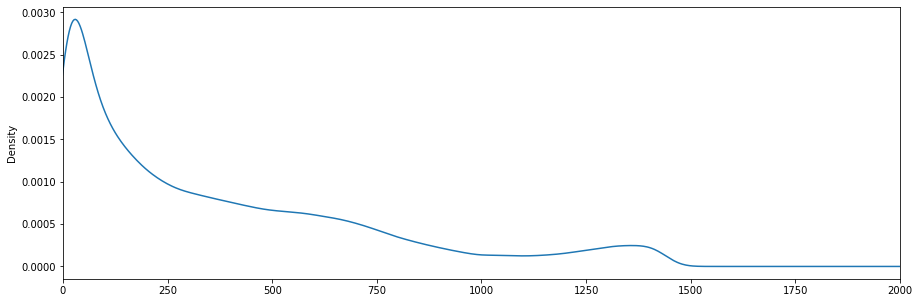

In [166]:
df['click.TimeDiffMinutes'].plot.density(figsize=(15,5))
plt.xlim((0, 2000))

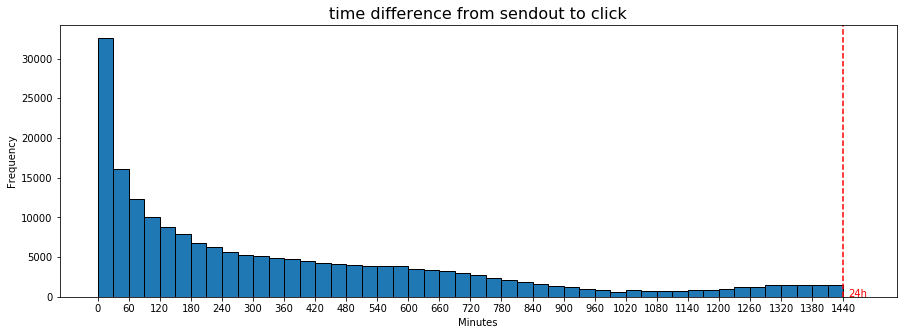

In [168]:
df['click.TimeDiffMinutes'].plot.hist(figsize=(15,5), edgecolor='black', bins=range(0, 1500, 30))
plt.xticks(np.arange(0, 1500, 60));
plt.xlabel('Minutes')
plt.title('time difference from sendout to click', fontsize=16)
plt.axvline(60*24, color='red', linestyle='--')
plt.text(60*24+10,0,'24h',rotation=0, color= 'red');

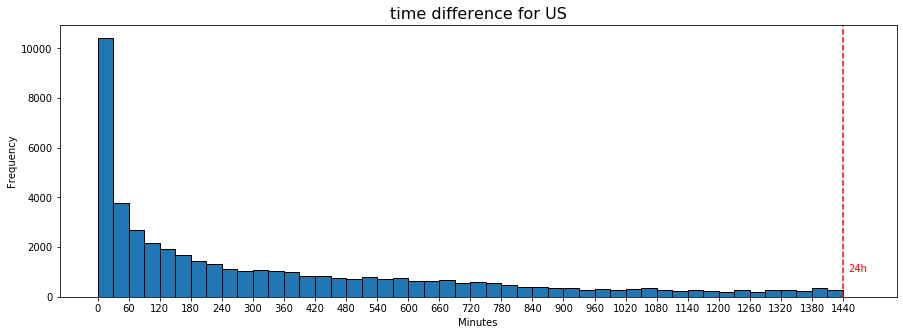

In [170]:
df_US = df.loc[df['user.ISOCountryCode']=='US']
df_US['click.TimeDiffMinutes'].plot.hist(figsize=(15,5), edgecolor='black', bins=range(0, 1500, 30))
plt.xticks(np.arange(0, 1500, 60));
plt.xlabel('Minutes')
plt.title('time difference for US', fontsize=16)
plt.axvline(60*24, color='red', linestyle='--')
plt.text(60*24+10,1000,'24h',rotation=0, color= 'red');

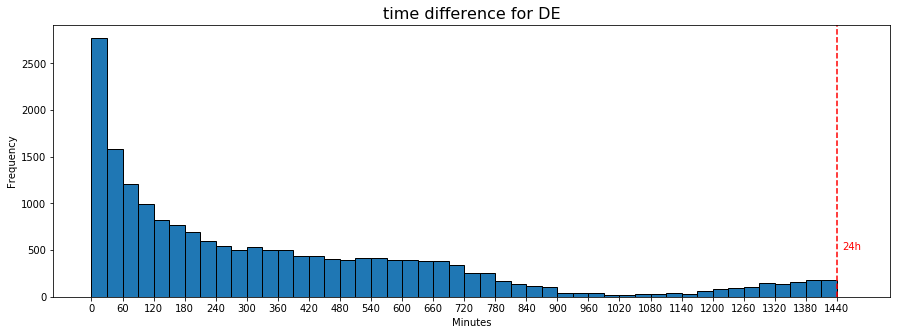

In [172]:
df_DE = df.loc[df['user.ISOCountryCode']=='DE']
df_DE['click.TimeDiffMinutes'].plot.hist(figsize=(15,5), edgecolor='black', bins=range(0, 1500, 30))
plt.xticks(np.arange(0, 1500, 60));
plt.xlabel('Minutes')
plt.title('time difference for DE', fontsize=16)
plt.axvline(60*24, color='red', linestyle='--')
plt.text(60*24+10,500,'24h',rotation=0, color= 'red');

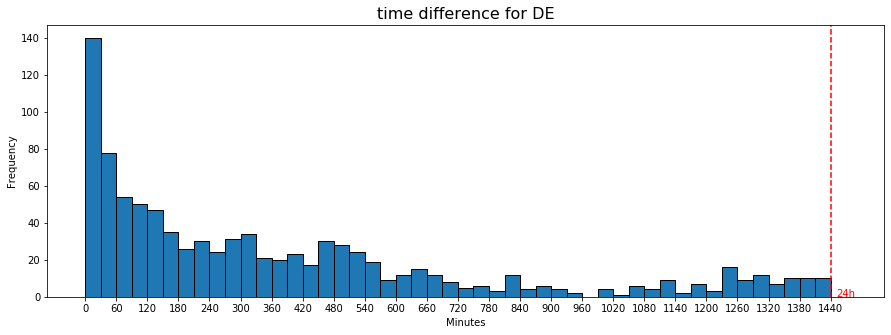

In [177]:
df_DE = df.loc[df['user.ISOCountryCode']=='DE']
df_DE = df_DE.loc[df['sendout.Hour'] > 9]
df_DE['click.TimeDiffMinutes'].plot.hist(figsize=(15,5), edgecolor='black', bins=range(0, 1500, 30))
plt.xticks(np.arange(0, 1500, 60));
plt.xlabel('Minutes')
plt.title('time difference for DE', fontsize=16)
plt.axvline(60*24, color='red', linestyle='--')
plt.text(60*24+10,0,'24h',rotation=0, color= 'red');

In [176]:
df_DE.aggregate

,Unnamed: 0,Unnamed: 0.1,user.Id,user.Email,user.MobileNumber,user.FaxNumber,user.Identifier,sentToMTA.Timestamp,sentToMTA.ExternalTransactionId,sentToMTA.SendoutChannel,skip.Timestamp,skip.Category,skip.ExternalTransactionId,bounce.Timestamp,bounce.Category,feedback.Timestamp,feedback.Category,render.Timestamp,render.GeoLocation.ISOCountryCode,render.GeoLocation.RegionCode,render.GeoLocation.City,render.GeoLocation.Latitude,render.GeoLocation.Longitude,render.UserAgent.Platform,render.UserAgent.OperatingSystemName,render.UserAgent.OperatingSystemVersion,render.UserAgent.ClientName,render.UserAgent.ClientVersion,render.UserAgent.RawString,click.Timestamp,click.Link.Id,click.Link.Category.Id,click.Link.Category.Name,click.Link.Url,click.Link.SystemLinkType,click.Link.Type,click.GeoLocation.ISOCountryCode,click.GeoLocation.RegionCode,click.GeoLocation.City,click.GeoLocation.Latitude,click.GeoLocation.Longitude,click.UserAgent.Platform,click.UserAgent.OperatingSystem,click.UserAgent.OperatingSystemVersion,click.UserAgent.ClientName,click.UserAgent.ClientVersion,click.UserAgent.RawString,unsubscribe.Timestamp,forward.Timestamp,conversion.cp.Timestamp,conversion.cp.Id,conversion.cp.Name,conversion.cp.OrderId,conversion.cp.ItemCount,conversion.cp.Amount,conversion.cp.RequestParameters,group.Id,group.Name,group.Email,group.Category.Id,group.Category.Name,message.Id,message.Name,message.Category.Id,message.Category.Name,message.Subject.Unresolved,message.ExternalId,message.Type,message.variation.Id,selection.Id,selection.Name,record.Timestamp,record.Type,record.sentToMTA.Timestamp,record.ExternalTransactionId,sendout.Type,sendout.AddresseeRole,sendout.RecipientType,user.DateOfBirth,user.FirstName,user.ISOCountryCode,user.ISOLanguageCode,user.LastName,user.Nickname,user.PartnerId,user.Source,user.TimeZone,user.Title,user.ZipCode,user.CustomAttribute['BeSCity'],user.CustomAttribute['BeSHome'],user.CustomAttribute['BeSHome2'],user.CustomAttribute['BeSHome3'],user.CustomAttribute['BeSStreet'],user.CustomAttribute['BesZip'],user.CustomAttribute['BIC'],user.CustomAttribute['City'],user.CustomAttribute['Coupon'],user.CustomAttribute['Coupon02'],user.CustomAttribute['IBAN'],user.CustomAttribute['Last_Open_Any_Newsletter_Date'],user.CustomAttribute['PartnerID'],user.CustomAttribute['ProductID'],user.CustomAttribute['SalesOrganization'],user.CustomAttribute['SCSMembernumber'],user.CustomAttribute['SCS_Boutique'],user.CustomAttribute['SCS_Boutique_City'],user.CustomAttribute['SCS_Boutique_Name1'],user.CustomAttribute['SCS_Boutique_Name2'],user.CustomAttribute['SCS_Boutique_Street'],user.CustomAttribute['SCS_Due_Date'],user.CustomAttribute['SCS_Entry_Date'],user.CustomAttribute['SCS_Expiry_Dat'],user.CustomAttribute['SCS_Magazine_Language_ISO'],user.CustomAttribute['SSFCardNumber'],user.CustomAttribute['Street'],user.CustomAttribute['Street2'],user.CustomAttribute['Street3'],user.CustomAttribute['Telephone'],user.CustomAttribute['TitleKey'],Year,click.Time,sendout.Time,sendout.Hour,click.TimeDiff,click.TimeDiffMinutes
205,205,41491,958582785,bierend@yahoo.de,NaN,NaN,C029806667,NaN,NaN,EMAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-02T13:31:38Z,9.0,0.0,0,https://www.swarovski.com/0707/category,NaN,NORMAL,DE,06,Nordhorn,52.433304,7.083298,tablet,Apple iOS,11,Safari,11.0,Mozilla/5.0 (iPad; CPU OS 11_2_1 like Mac OS X...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,900591535.0,SCS DE NON-SHOP,scsdeanew@newsletter.swarovski-newsletter.com,261.0,SCS,2700036121,180202_de_RW_SCS_SCS News 03/18_None_SCSActive...,NaN,NaN,Liebe Geschenkideen für den Valentinstag,NaN,normal,NaN,NaN,NaN,2018-02-02T13:31:38Z,Click,2018-02-02T10:30:23Z,NaN,MAJOR,NORMAL,TO,1975-03-21T01:00:00.000+0100,Vanessa,DE,de,Bierend-Duff,NaN,NaN,i,NaN,2.0,37115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Duderstadt,NaN,NaN,NaN,2018-10-11T10:25:20Z,C015589604,NaN,1530.0,1.530090e+09,173097.0,Braunschweig,SWAROVSKI Braunschweig,Inh. Christian Wollik,Platz am Ritterbrunnen 

In [178]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 